# 3.7 추정 ★

3.1~3.3절 - 기술통계의 기초

3.4~3.6절 - 추측통계의 기초 (샘플링, 정규분포, t분포)

3.7절 - 추정

3.8~3.11절 - 통계적가설검정
 


In [5]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/Colab\ Notebooks/StatisticsWithPython/data/

3.7.1 분석 준비

In [6]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from typing import Tuple

%precision 3
%matplotlib inline

In [7]:
# fish = pd.read_csv("3-7-1-fish_length.csv")["length"]
fish = pd.read_csv("../../data/3-7-1-fish_length.csv")["length"]

In [8]:
print(f"fish (w/o setting)    : \n{fish}")
print()
print(f"fish (w/ precision 3) : \n{fish.round(3)}")

fish (w/o setting)    : 
0    4.352982
1    3.735304
2    5.944617
3    3.798326
4    4.087688
5    5.265985
6    3.272614
7    3.526691
8    4.150083
9    3.736104
Name: length, dtype: float64

fish (w/ precision 3) : 
0    4.353
1    3.735
2    5.945
3    3.798
4    4.088
5    5.266
6    3.273
7    3.527
8    4.150
9    3.736
Name: length, dtype: float64


3.7.2 점추정

**점추정**이란 모수(모집단분포의 파라미터)를 어느 1개의 값으로 추정하는 추정 방법입니다.$^{[1]}$

In [9]:
mu = np.mean(fish)
print(f"mu: {mu:.3f}")

sigma_2 = np.var(fish, ddof=1)
print(f"sigma_2: {sigma_2:.3f}")

mu: 4.187
sigma_2: 0.680


3.7.3 구간추정$^{[1]}$

- **구간추정**은 추정값이 폭을 가지게 하는 추정 방법 입니다. 추정값의 폭 계산에는 확률의 개념을 사용합니다.

3.7.4 신뢰계수와 신뢰구간$^{[1]}$

- **신뢰계수**란 구간추정의 폭에 대한 신뢰 정도를 확률로 표현한 것입니다.

- **신뢰구간**이란 특정 신뢰계수를 만족하는 구간입니다.

3.7.5 신뢰한계$^{[1]}$

- **신뢰한계**는 신뢰구간의 하한값과 상한값입니다. (하측신뢰한계 및 상측신뢰한계)

3.7.6 신뢰구간 계산 방법$^{[1]}$

- 구간추정을 할 때는 t분포의 퍼센트포인트(어떤 확률이 되는 기준점)를 사용합니다.

3.7.7 구간추정 (실습)

In [10]:
df1 = len(fish) - 1
print(df1)

9


In [11]:
sigma = np.std(fish, ddof=1)
se = sigma / np.sqrt(len(fish))
print(f"standard error: {se:.3f}")

standard error: 0.261


In [12]:
interval1: Tuple = stats.t.interval(alpha=0.95, df=df1, loc=mu, scale=se)
print(f"({interval1[0]:.3f}, {interval1[1]:.3f})")

(3.597, 4.777)


3.7.8 신뢰구간을 구하는 방법 상세 설명 (188~189p)

In [13]:
t_975 = stats.t.ppf(q=0.975, df=df1)
print(f"{t_975:.3f}")

lower = mu - t_975 * se
print(f"lower : {lower:.3f}")

upper = mu + t_975 * se
print(f"upper : {upper:.3f}")

2.262
lower : 3.597
upper : 4.777


3.7.9 신뢰구간의 폭을 결정하는 요소

In [14]:
# standard deviation
se2 = (sigma * 10) / np.sqrt(len(fish))
interval2: Tuple = stats.t.interval(alpha=0.95, df=df1, loc=mu, scale=se2)

# sample size
df2 = (len(fish) * 10) - 1
se3 = sigma / np.sqrt(len(fish) * 10)
interval3: Tuple = stats.t.interval(alpha=0.95, df=df2, loc=mu, scale=se2)

# confidence interval
interval4: Tuple = stats.t.interval(alpha=0.99, df=df1, loc=mu, scale=se)

print(f"interval1 (-)                   : ({interval1[0]:.3f}, {interval1[1]:.3f})")
print(f"interval2 (standard deviation)  : ({interval2[0]:.3f}, {interval2[1]:.3f})")
print(f"interval3 (sample size)         : ({interval3[0]:.3f}, {interval3[1]:.3f})")
print(f"interval4 (confidence interval) : ({interval4[0]:.3f}, {interval4[1]:.3f})")

interval1 (-)                   : (3.597, 4.777)
interval2 (standard deviation)  : (-1.713, 10.087)
interval3 (sample size)         : (-0.988, 9.362)
interval4 (confidence interval) : (3.339, 5.035)


3.7.10 구간추정 결과의 해석$^{[1]}$

1. 원래 모집단분포에서 표본을 추출합니다.

2. 이번에도 같은 방법으로 95% 신뢰구간을 계산합니다.

3. 이 시행을 여러번 반복합니다.

4. 모든 시행 중 원래 모집단이 신뢰구간에 포함되는 비율이 95%입니다.

In [15]:
be_included_array = np.zeros(20000, dtype="bool")
print(be_included_array)

[False False False ... False False False]


In [31]:
np.random.seed(1)
norm_dist = stats.norm(loc=4, scale=0.8)
for i in range(0, 20000):
    sample = norm_dist.rvs(size=10)
    df_sample = len(sample) - 1
    mu = np.mean(sample)
    std = np.std(sample, ddof=1)
    se = std / np.sqrt(len(sample))
    interval_95 = stats.t.interval(0.95, df_sample, mu, se)

    if(interval_95[0] <= 4 and interval_95[1] >= 4):
        be_included_array[i] = True

In [24]:
print(f"percent : {sum(be_included_array) / len(be_included_array) * 100}%")

percent : 94.8%


Text(0.5, 1.0, 'Figure 3.7.10')

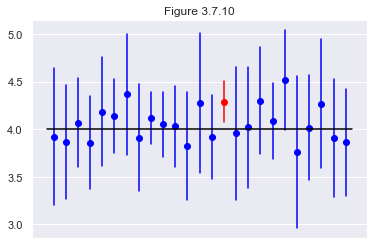

In [47]:
np.random.seed(1)
num_sample = 25

for i in range(0, num_sample):
    sample = norm_dist.rvs(size=10)
    df_sample = len(sample) - 1
    mu = np.mean(sample)
    std = np.std(sample, ddof=1)
    se = std / np.sqrt(len(sample))
    interval_95 = stats.t.interval(0.95, df_sample, mu, se)

    # Write python code that plots "Figure 3.7.10".

# Write python code that plots "Figure 3.7.10".

참고문헌: 

[1] 파이썬으로 배우는 통계학 교과서; 바바 신야 지음, 윤옹식 옮김; 한빛미디어 (2020)